# Regression Diagnostics

In [1]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
def standard_units(any_numbers):
    "Convert an array of numbers to standard units"
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

# Below t is a table and x and y are column indices or labels

def correlation(t, x, y):
    "The correlation coefficient (r) of two variables"
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

def slope(t, x, y):
    "The slope of the regression line in original units"
    r = correlation(t, x, y)
    return r*np.std(t.column(y))/np.std(t.column(x))

def intercept(t, x, y):
    "The intercept of the regression line in original units"
    a = slope(t, x, y)
    return np.mean(t.column(y))-a*np.mean(t.column(x))

def fitted_values(t, x, y):
    "The fitted values along the regression line"
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x)+b

In [3]:
galton = Table().read_table('galton.csv')
midparent_height = (galton.column('Father') + galton.column('Mother'))/2
heights = Table().with_columns('MidParent', midparent_height, 
                              'Child', galton.column('Child'))
heights

MidParent,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69
71,73.5
71,72.5
71,65.5
71,65.5
69.5,71
69.5,68


In [4]:
heights = heights.with_columns('Fitted', fitted_values(heights, 0, 1))
heights

MidParent,Child,Fitted
72.75,73.2,70.8374
72.75,69.2,70.8374
72.75,69,70.8374
72.75,69,70.8374
71,73.5,69.6662
71,72.5,69.6662
71,65.5,69.6662
71,65.5,69.6662
69.5,71,68.6623
69.5,68,68.6623


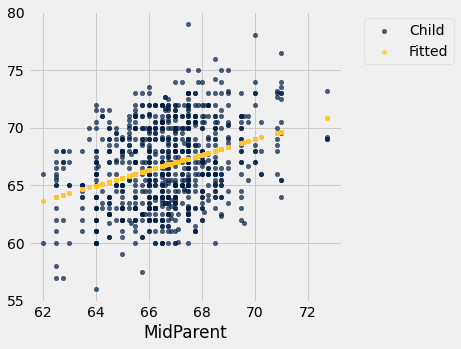

In [6]:
heights.scatter(0)

**Question 1.** Write a function named `residuals` that returns the residual value for each fitted value from the regression line. Add a column to the heights table named `Residual` that has the residual values.

In [7]:
# Question 1

def residuals(t, x, y):
    return t.column(y) - fitted_values(t, x, y)

heights = heights.with_columns('Residual', residuals(heights, 'MidParent', 'Child'))

Look at the scatter plot of the `heights` table.

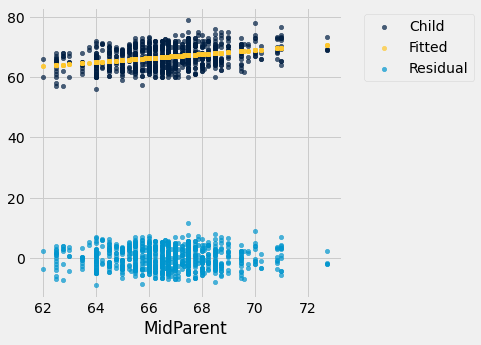

In [10]:
heights.scatter(0)

Plot the data and the residuals on separately. 

In [12]:
def plot_residuals(t, x, y):
    with_residuals = t.with_columns('Fitted',   fitted_values(t, x, y),
                                    'Residual', residuals(t, x, y)
                                   )
    with_residuals.select(x, y, 'Fitted').scatter(0)
    with_residuals.scatter(x, 'Residual')

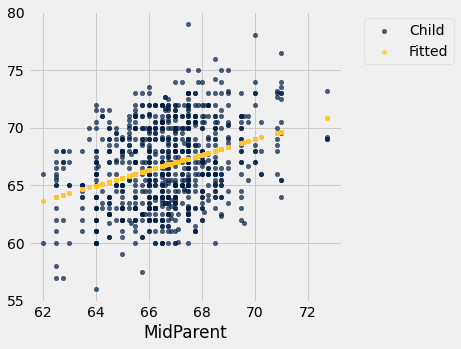

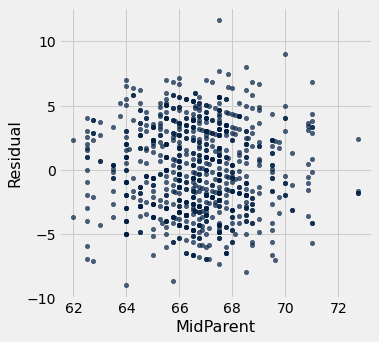

In [13]:
plot_residuals(heights, 'MidParent', 'Child')

# Nonlinearity

In [5]:
dugong = Table.read_table('dugong.csv')
dugong.show()

Length,Age
1.8,1
1.85,1.5
1.87,1.5
1.77,1.5
2.02,2.5
2.27,4
2.15,5
2.26,5
2.35,7
2.47,8


Let's take a look at the correlation coefficient.

In [14]:
correlation(dugong, 'Length', 'Age')

0.8296474554905714

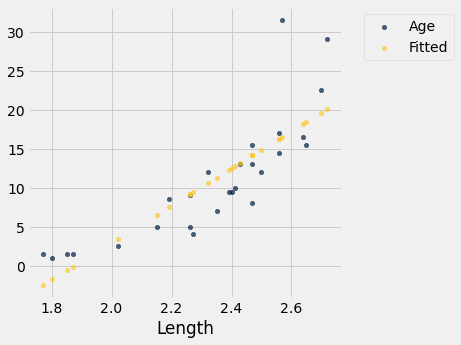

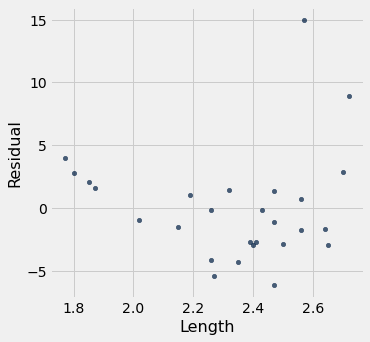

In [15]:
plot_residuals(dugong, 'Length', 'Age')

In [ ]:
height_vs_average_weight 